<a href="https://colab.research.google.com/github/RakeshBhugra/Stocks-with-Exogenous-Covid-Regressors/blob/main/AutoTS_exogenous_regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto_ts

     |████████████████████████████████| 51kB 3.0MB/s 
     |████████████████████████████████| 1.3MB 11.0MB/s 
     |████████████████████████████████| 962kB 41.7MB/s 
  Created wheel for pyflux: filename=pyflux-0.4.15-cp36-cp36m-linux_x86_64.whl size=4656560 sha256=215ddd6a49bcb82894b438a08903f4ab21080470aa67bd335e7dc4c31e8fd2ae
  Stored in directory: /root/.cache/pip/wheels/36/24/09/d18fa4f926cc90598d23ebd09fb4b0fd7b3dd1d2f506b952de
Successfully built pyflux


In [ ]:

import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
import auto_ts as AT

import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

Running Auto Timeseries version: 0.0.20...Call by using:
        auto_ts.Auto_Timeseries(traindata, ts_column,
                            target, sep,  score_type='rmse', forecast_period=5,
                            time_interval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None, model_type='stats',
                            verbose=1)
    To run three models from Stats, ML and FB Prophet, set model_type='best'
To remove previous versions, perform 'pip uninstall auto_ts'
To get the latest version, perform "pip install auto_ts --no-cache-dir --ignore-installed"


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Stats/merge2.xlsx')

In [ ]:
df['Date'] = pd.to_datetime(df['Unnamed: 0'])
df.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [ ]:
df.head()

,date,Open,High,Low,Close,Adj Close,Volume,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date
0,2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519,1,1,0,0,0,0,2020-01-30
1,2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484,0,1,0,0,0,0,2020-01-31
2,2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313,1,3,0,0,0,0,2020-02-03
3,2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618,0,3,0,0,0,0,2020-02-04
4,2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869,0,3,0,0,0,0,2020-02-05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             201 non-null    object        
 1   Open             201 non-null    float64       
 2   High             201 non-null    float64       
 3   Low              201 non-null    float64       
 4   Close            201 non-null    float64       
 5   Adj Close        201 non-null    float64       
 6   Volume           201 non-null    int64         
 7   Daily Confirmed  201 non-null    int64         
 8   Total Confirmed  201 non-null    int64         
 9   Daily Recovered  201 non-null    int64         
 10  Total Recovered  201 non-null    int64         
 11  Daily Deceased   201 non-null    int64         
 12  Total Deceased   201 non-null    int64         
 13  Date             201 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(7)

In [ ]:
ec_df = df.set_index('date')

In [ ]:
ec_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date
date,,,,,,,,,,,,,
2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519,1,1,0,0,0,0,2020-01-30
2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484,0,1,0,0,0,0,2020-01-31
2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313,1,3,0,0,0,0,2020-02-03
2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618,0,3,0,0,0,0,2020-02-04
2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869,0,3,0,0,0,0,2020-02-05


In [ ]:
ec_data = ec_df['Close']
ec_data.head()

date
2020-01-30    1674.900024
2020-01-31    1665.400024
2020-02-03    1646.349976
2020-02-04    1447.550049
2020-02-05    1376.500000
Name: Close, dtype: float64

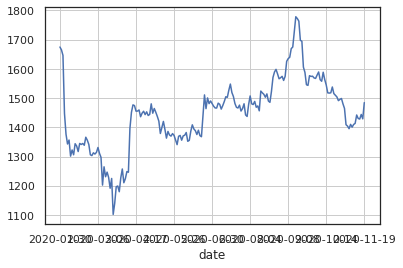

In [ ]:
ec_data.plot(grid=True)

In [ ]:
final_df = df.copy()

In [ ]:
final_df.head()

,date,Open,High,Low,Close,Adj Close,Volume,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date
0,2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519,1,1,0,0,0,0,2020-01-30
1,2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484,0,1,0,0,0,0,2020-01-31
2,2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313,1,3,0,0,0,0,2020-02-03
3,2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618,0,3,0,0,0,0,2020-02-04
4,2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869,0,3,0,0,0,0,2020-02-05


In [ ]:
train = final_df[:191]
test = final_df[191:]
print(train.shape, test.shape)
train.head()

(191, 14) (10, 14)


,date,Open,High,Low,Close,Adj Close,Volume,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date
0,2020-01-30,1690.099976,1709.699951,1665.300049,1674.900024,1653.261841,32519,1,1,0,0,0,0,2020-01-30
1,2020-01-31,1694.000000,1694.000000,1655.000000,1665.400024,1643.884644,30484,0,1,0,0,0,0,2020-01-31
2,2020-02-03,1645.000000,1678.300049,1611.250000,1646.349976,1625.080688,50313,1,3,0,0,0,0,2020-02-03
3,2020-02-04,1520.000000,1522.000000,1425.050049,1447.550049,1428.848999,342618,0,3,0,0,0,0,2020-02-04
4,2020-02-05,1434.099976,1538.800049,1365.000000,1376.500000,1358.716919,614869,0,3,0,0,0,0,2020-02-05


In [ ]:
ts_column = 'date'
sep = ','
target = 'Close'

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (191, 13)
    Target variable = Close
Time series input in days = 1
it is a Daily time series.

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
                   Close         Open  ...  Total Deceased       Date
date                                  ...                           
2020-01-30  1674.900024  1690.099976  ...               0 2020-01-30

[1 rows x 13 columns]
Time Series data: sample row after transformation
           ds            y  ...  Total Deceased       Date
0 2020-01-30  1674.900024  ...               0 2020-01-30

[1 rows x 14 columns]
    Fit-Predict data (shape=(191, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 10


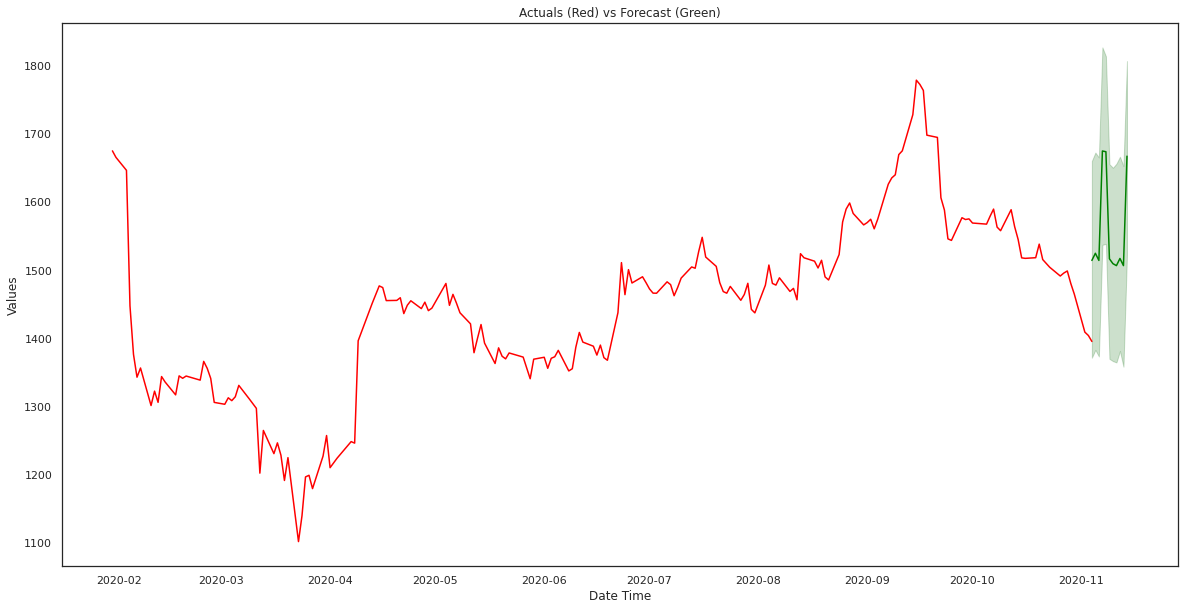

    RMSE = 118.80
    Std Deviation of Originals = 124.12
    Normalized RMSE = 96%

Running PyFlux Model...
Cycling through various (p,d,q) parameters

Best Params Selected (based on rmse): (3, 1, 3)
Dynamic 10-period Forecasts:
    RMSE = 66.71
    Std Deviation of Originals = 127.04
    Normalized RMSE = 53%

Running Non Seasonal ARIMA Model...

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 1, MA order q = 0, Interim metric = 1794.226

Differencing = 1
 Iteration 30 completed...
    Best AR order p = 2, MA order q = 2, Interim metric = 1779.083

Best model is: Non Seasonal ARIMA(2,1,2), aic = 1779.083
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
    ARIMA model error: predictions not available.

Running Seasonal SARIMAX Model...
Building a Non Seasonal Model...

Finding best Non Seasonal Parameters:

Differencing = 0
    Iteration 0 completed...
    Best AR order p = 1, MA order q = 3, Inte

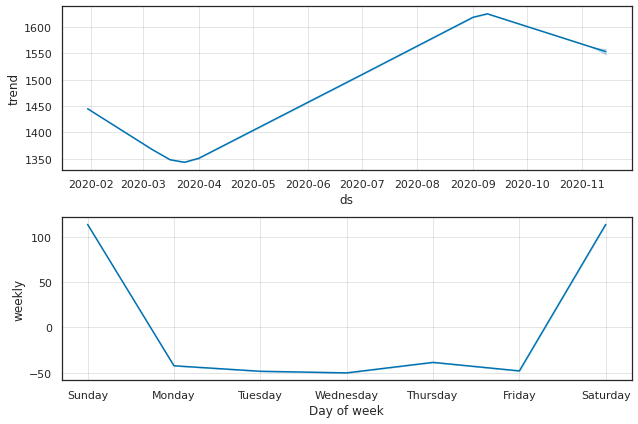

In [ ]:
l_dict = AT.Auto_Timeseries(train, ts_column,
                            target, sep,  score_type='rmse', forecast_period=10,
                            model_type='best',
                            verbose=2)

In [ ]:
:test.head()

,date,Open,High,Low,Close,Adj Close,Volume,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date
191,2020-11-05,1410.000000,1430.000000,1398.000000,1410.099976,1410.099976,50264,47628,8410957,54133,7764596,672,124437,2020-11-05
192,2020-11-06,1418.000000,1423.400024,1395.449951,1400.550049,1400.550049,56387,50017,8460974,53946,7818542,577,125014,2020-11-06
193,2020-11-09,1407.000000,1425.000000,1405.000000,1409.750000,1409.750000,79166,37119,8590953,41449,7957038,450,126512,2020-11-09
194,2020-11-10,1423.000000,1429.500000,1405.000000,1413.550049,1413.550049,48301,44724,8635677,54639,8011677,511,127023,2020-11-10
195,2020-11-11,1418.099976,1448.000000,1405.099976,1442.199951,1442.199951,47147,48285,8683962,52704,8064381,550,127573,2020-11-11
